In [26]:
import numpy as np 
import pandas as pd 
import offset_analysis as a

In [22]:
n_samples = 50
input_dir = "C:/Users/luke/OneDrive/Documents/MPhys Project/Output Files/110124_50_500k@200k/"

offsets_y = np.loadtxt(input_dir + "offsets_y.csv", delimiter = ",")
offsets_z = np.loadtxt(input_dir + "offsets_z.csv", delimiter = ",")

In [23]:
a.Analyse_Run(input_dir, 2, offsets_y=offsets_y[2], offsets_z=offsets_z[2])

OFFSET RECONSTRUCTION SUMMARY FOR TRACKING PLANE 1

Y AXIS
PREDICTED OFFSET: 0.0
TRUE OFFSET: 0.0
RESIDUAL: 0.0
PERCENTAGE DIFFERENCE: nan

Z AXIS
PREDICTED OFFSET: 0.0
RESIDUAL: 0.0
PERCENTAGE DIFFERENCE: nan


OFFSET RECONSTRUCTION SUMMARY FOR TRACKING PLANE 2

Y AXIS
PREDICTED OFFSET: 0.05323074641413792
TRUE OFFSET: 0.05423835492099918
RESIDUAL: -0.0010076085068612614
PERCENTAGE DIFFERENCE: -1.8577416448726964

Z AXIS
PREDICTED OFFSET: -0.03681237619974274
RESIDUAL: 0.0027136579104599587
PERCENTAGE DIFFERENCE: 7.9582402113714075


OFFSET RECONSTRUCTION SUMMARY FOR TRACKING PLANE 3

Y AXIS
PREDICTED OFFSET: 0.08771940422692537
TRUE OFFSET: 0.09211285598111399
RESIDUAL: -0.004393451754188621
PERCENTAGE DIFFERENCE: -4.769640141316882

Z AXIS
PREDICTED OFFSET: 0.03780559399790418
RESIDUAL: -0.0034040577457362664
PERCENTAGE DIFFERENCE: -8.260340967966533


OFFSET RECONSTRUCTION SUMMARY FOR TRACKING PLANE 4

Y AXIS
PREDICTED OFFSET: 0.0
TRUE OFFSET: 0.0
RESIDUAL: 0.0
PERCENTAGE DIFFERENC

(array([0.        , 0.05323075, 0.0877194 , 0.        , 0.        ,
        0.        ]),
 array([ 0.        , -0.03681238,  0.03780559,  0.        ,  0.        ,
         0.        ]))

In [27]:
pred_offsets_y, pred_offsets_z = a.Analyse_Multiple_Runs(input_dir, n_samples, offsets_y, offsets_z)

OFFSET RECONSTRUCTION SUMMARY FOR TRACKING PLANE 1

Y AXIS
PREDICTED OFFSET: 0.0
TRUE OFFSET: 0.0
RESIDUAL: 0.0
PERCENTAGE DIFFERENCE: nan

Z AXIS
PREDICTED OFFSET: 0.0
RESIDUAL: 0.0
PERCENTAGE DIFFERENCE: nan


OFFSET RECONSTRUCTION SUMMARY FOR TRACKING PLANE 2

Y AXIS
PREDICTED OFFSET: -0.036407039422269895
TRUE OFFSET: -0.03624735326563222
RESIDUAL: 0.00015968615663767421
PERCENTAGE DIFFERENCE: 0.4405457012749121

Z AXIS
PREDICTED OFFSET: 0.06676532411683575
RESIDUAL: -0.0037104231243022257
PERCENTAGE DIFFERENCE: -5.264822679505246


OFFSET RECONSTRUCTION SUMMARY FOR TRACKING PLANE 3

Y AXIS
PREDICTED OFFSET: 0.03798955856386758
TRUE OFFSET: 0.041124666777898757
RESIDUAL: -0.0031351082140311792
PERCENTAGE DIFFERENCE: -7.623425208434882

Z AXIS
PREDICTED OFFSET: 0.02902731444691218
RESIDUAL: -0.0038245612708521434
PERCENTAGE DIFFERENCE: -11.641835320788244


OFFSET RECONSTRUCTION SUMMARY FOR TRACKING PLANE 4

Y AXIS
PREDICTED OFFSET: 0.0
TRUE OFFSET: 0.0
RESIDUAL: 0.0
PERCENTAGE DIFF

In [44]:
offsets_y_flat = offsets_y.flatten()
truth = offsets_y_flat[offsets_y_flat != 0]
pred = pred_offsets_y[pred_offsets_y != 0]

rel_err = (((pred - truth)/truth)*100)

print("Mean Relative Error: " + str(np.mean(rel_err)))
print("Median Relative Error: " + str(np.median(rel_err)))
print("Standard Deviation Relative Error: " + str(np.std(rel_err)))

Mean Relative Error: -1.5735715665009276
Median Relative Error: -0.44736042245595153
Standard Deviation Relative Error: 12.655815356527063


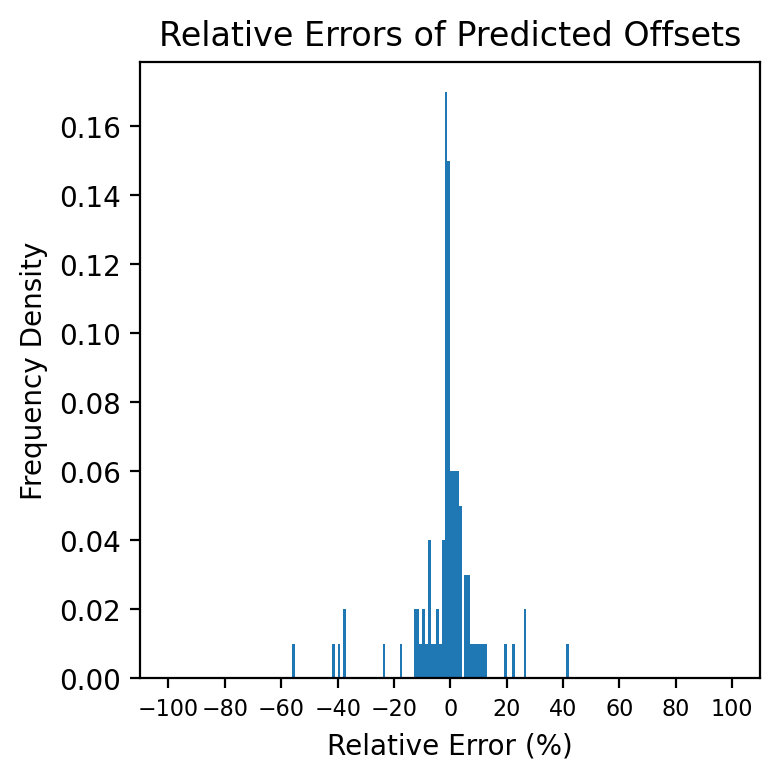

In [61]:
from matplotlib import pyplot as plt

plt.figure(figsize = (4,4), dpi = 200)
plt.hist(rel_err, bins = np.arange(-100, 101), density = True)
plt.xlabel("Relative Error (%)")
plt.ylabel("Frequency Density")
plt.title("Relative Errors of Predicted Offsets")
plt.xticks(np.arange(-100,120,20), size = 8)
plt.show()